# Connecticut County to Planning Region Transition

Beginning in 2022, the Census API started returning data
aggregated at the planning region level instead of the
county level. This change only affect Connecticut, which
uses planning regions for many of the purposes for which
other states use counties.

This notebook illustrates the change by querying some data
for 2021 and for 2022. Note that in both cases we ask for
county level geography, but in 2022 we get back planning 
regions. We can see the difference in the number of rows
returned, the names, and the geographies on the maps we plot.

In [1]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.datasets import ACS5
import censusdis.states as states

## 2021

In [2]:
# 2021 will return counties.
gdf_ct_2021 = ced.download(
    ACS5,
    2021,
    ["NAME", "B25024_010E"],
    state=states.CT,
    county="*",
    with_geometry=True,
)

In 2021, we get counties, as we would have in all previous years.
Note that the FIPS codes in the `COUNTY` column are between `"001"` and
`"015"`.

In [3]:
gdf_ct_2021

,STATE,COUNTY,NAME,B25024_010E,geometry
0,09,001,"Fairfield County, Connecticut",1241,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ..."
1,09,003,"Hartford County, Connecticut",2090,"POLYGON ((-73.02054 42.00009, -73.00876 42.038..."
2,09,005,"Litchfield County, Connecticut",353,"POLYGON ((-73.51795 41.67086, -73.51678 41.687..."
3,09,007,"Middlesex County, Connecticut",772,"POLYGON ((-72.75294 41.5925, -72.74284 41.5944..."
4,09,009,"New Haven County, Connecticut",1639,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ..."
5,09,011,"New London County, Connecticut",2968,"MULTIPOLYGON (((-72.22593 41.29384, -72.22523 ..."
6,09,013,"Tolland County, Connecticut",813,"POLYGON ((-72.51733 41.8699, -72.51692 41.8736..."
7,09,015,"Windham County, Connecticut",1364,"POLYGON ((-72.25208 41.72706, -72.25264 41.728..."


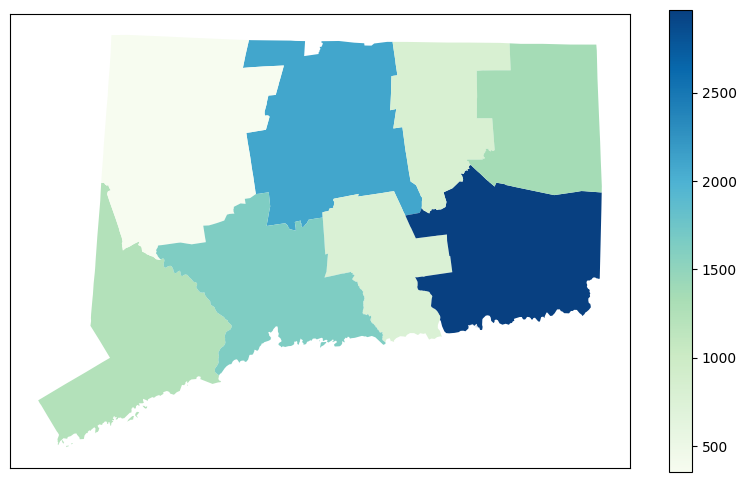

In [4]:
cem.plot_map(gdf_ct_2021, "B25024_010E", cmap="GnBu", legend=True, figsize=(10, 6));

## 2022

In [5]:
# 2022 will return planning regions.
gdf_ct_2022 = ced.download(
    ACS5,
    2022,
    ["NAME", "B25024_010E"],
    state=states.CT,
    county="*",
    with_geometry=True,
)

In 2022, we get planning regions, which have new FIPS codes in the `COUNTY` column that are between `"110"` and
`"190"`.

In [6]:
gdf_ct_2022

,STATE,COUNTY,NAME,B25024_010E,geometry
0,09,110,"Capitol Planning Region, Connecticut",2664,"POLYGON ((-72.95364 41.85392, -72.94634 41.874..."
1,09,120,"Greater Bridgeport Planning Region, Connecticut",167,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ..."
2,09,130,Lower Connecticut River Valley Planning Region...,922,"POLYGON ((-72.75294 41.5925, -72.74284 41.5944..."
3,09,140,"Naugatuck Valley Planning Region, Connecticut",1281,"POLYGON ((-73.32684 41.48597, -73.32487 41.489..."
4,09,150,"Northeastern Connecticut Planning Region, Conn...",789,"POLYGON ((-72.22328 41.98167, -72.21642 41.996..."
5,09,160,"Northwest Hills Planning Region, Connecticut",75,"POLYGON ((-73.51795 41.67086, -73.51678 41.687..."
6,09,170,"South Central Connecticut Planning Region, Con...",1102,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ..."
7,09,180,"Southeastern Connecticut Planning Region, Conn...",3400,"MULTIPOLYGON (((-72.22593 41.29384, -72.22523 ..."
8,09,190,"Western Connecticut Planning Region, Connecticut",857,"MULTIPOLYGON (((-73.72778 41.1007, -73.71229 4..."


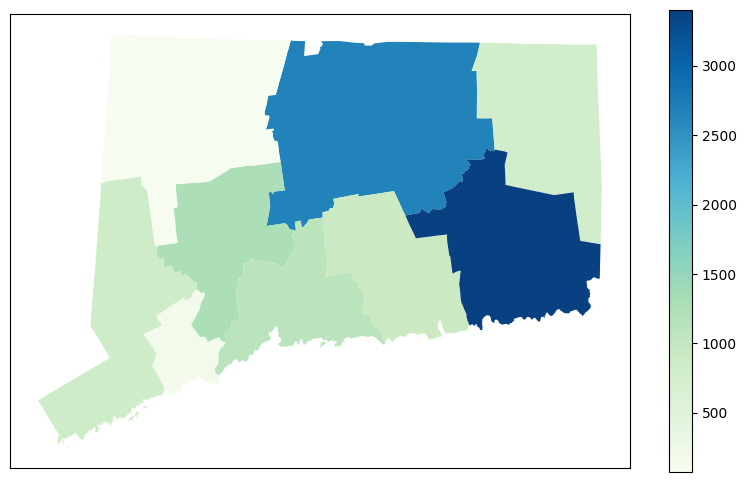

In [7]:
cem.plot_map(gdf_ct_2022, "B25024_010E", cmap="GnBu", legend=True, figsize=(10, 6));

## Constants

We have constants for both the counties and the planning regions to make things easier. Some examples are shown below.

In [8]:
from censusdis.counties.connecticut import HARTFORD
from censusdis.counties.connecticut import CAPITOL_PLANNING_REGION

In [9]:
HARTFORD

'003'

In [10]:
CAPITOL_PLANNING_REGION

'110'